In [1]:
import numpy as np
import cv2
from scipy import signal
import matplotlib.pyplot as plt
import time

# Part-1

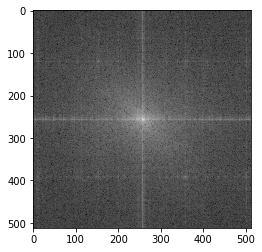

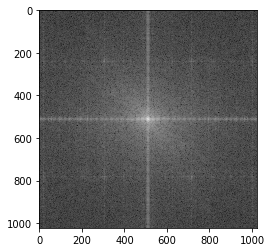

In [10]:
img1 = cv2.cvtColor(cv2.imread('DIP_2019_A3/land.png'),cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(cv2.imread('DIP_2019_A3/lena.jpg'),cv2.COLOR_BGR2GRAY)
a1,b1 = img1.shape
a2,b2 = img2.shape
p1 = np.zeros((min(a1,a2)+abs(a2-a1),min(b1,b2)+abs(b2-b1)))
p2 = np.zeros((min(a1,a2)+abs(a2-a1),min(b1,b2)+abs(b2-b1)))

p1[:a1,:b1] = img1[:,:]
p2[:a2,:b2] = img2[:,:]
f1 = np.fft.fft2(p1)
f2 = np.fft.fft2(p2)
img = signal.convolve2d(p1,p2)
out = np.fft.fft2(img)
plt.imshow(np.abs(np.log(1+np.fft.fftshift(np.multiply(f1,f2)))),'gray')
plt.show()
plt.imshow(np.abs(np.log(1+np.fft.fftshift(out))),'gray')
plt.show()

# Part-2

In [8]:
def conv(img1,img2):
    a = time.time()
    o = signal.convolve2d(img1,img2)
    return time.time() - a
def conv_fft(img1,img2):
    a = time.time()
    a1,b1 = img1.shape
    a2,b2 = img2.shape
    p1 = np.zeros((min(a1,a2)+abs(a2-a1),min(b1,b2)+abs(b2-b1)))
    p2 = np.zeros((min(a1,a2)+abs(a2-a1),min(b1,b2)+abs(b2-b1)))

    p1[:a1,:b1] = img1[:,:]
    p2[:a2,:b2] = img2[:,:]
    f1 = np.fft.fft2(p1)
    f2 = np.fft.fft2(p2)
    o = np.fft.ifft2(np.multiply(f1,f2))
    return time.time() - a

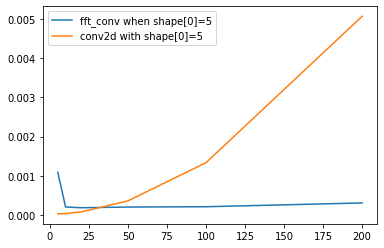

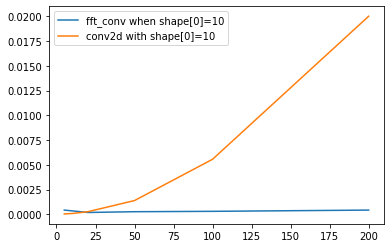

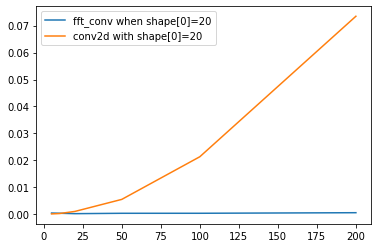

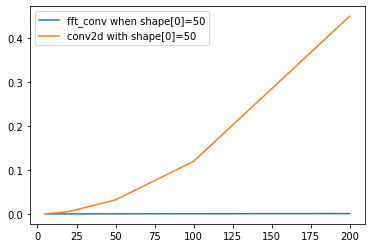

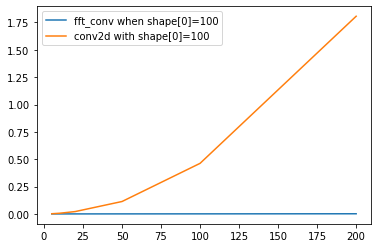

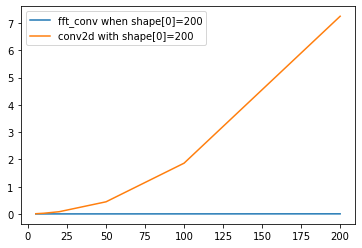

In [12]:
a = [5,10,20,50,100,200]

for i in range(len(a)):
    x = []
    y = []
    for j in range(len(a)):
        temp1 = np.random.randint(256,size=(a[i],a[j]))
        temp2 = np.random.randint(256,size=(a[i],a[j]))
#         print(temp1.shape,temp2.shape)
        y.append(conv_fft(temp1,temp2))
        x.append(conv(temp1,temp2))
    plt.plot(a,y,label="fft_conv when shape[0]="+str(a[i]) )
    plt.plot(a,x,label="conv2d with shape[0]="+str(a[i]))
    plt.legend()
    plt.show()